In [1]:
import pandas as pd 
import numpy as np 
from tensorflow.keras import layers, Sequential
import pathlib
import cv2 
import os

In [2]:
data_dir="data"

In [3]:
dataset_dir=pathlib.Path(data_dir)

In [5]:
images_dict={
    'with_mask':list(dataset_dir.glob('with_mask/*')),
    'without_mask':list(dataset_dir.glob('without_mask/*')),
}

In [6]:
labels_dict={
    'with_mask':1,
    'without_mask':0
}

In [7]:
X,y=[],[]

for label,images in images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(labels_dict[label])

In [8]:
X=np.array(X)
y=np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
model=Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7372928   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [13]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics='accuracy')

In [15]:
history=model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10
177/177 [==============================] - 59s 333ms/step - loss: 0.4226 - accuracy: 0.8337 - val_loss: 0.2718 - val_accuracy: 0.8989
Epoch 2/10
177/177 [==============================] - 59s 335ms/step - loss: 0.2370 - accuracy: 0.9043 - val_loss: 0.2236 - val_accuracy: 0.9174
Epoch 3/10
177/177 [==============================] - 59s 333ms/step - loss: 0.1880 - accuracy: 0.9274 - val_loss: 0.2057 - val_accuracy: 0.9132
Epoch 4/10
177/177 [==============================] - 59s 332ms/step - loss: 0.1527 - accuracy: 0.9419 - val_loss: 0.2052 - val_accuracy: 0.9164
Epoch 5/10
177/177 [==============================] - 61s 345ms/step - loss: 0.1012 - accuracy: 0.9627 - val_loss: 0.1880 - val_accuracy: 0.9312
Epoch 6/10
177/177 [==============================] - 59s 336ms/step - loss: 0.0763 - accuracy: 0.9737 - val_loss: 0.2239 - val_accuracy: 0.9201
Epoch 7/10
177/177 [==============================] - 59s 335ms/step - loss: 0.0540 - accuracy: 0.9811 - val_loss: 0.2263 - val_ac

In [16]:
model.evaluate(X_test,y_test)

60/60 [==============================] - 4s 72ms/step - loss: 0.3216 - accuracy: 0.9211


[0.32156094908714294, 0.9211223125457764]

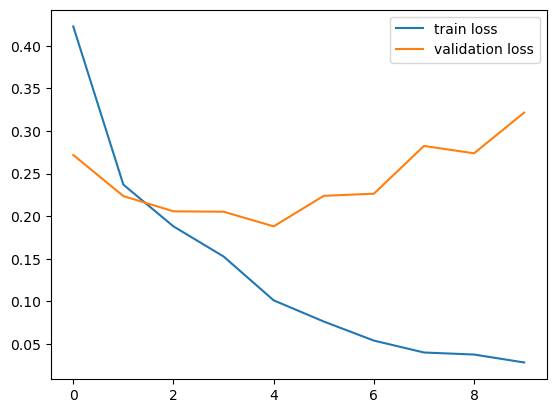

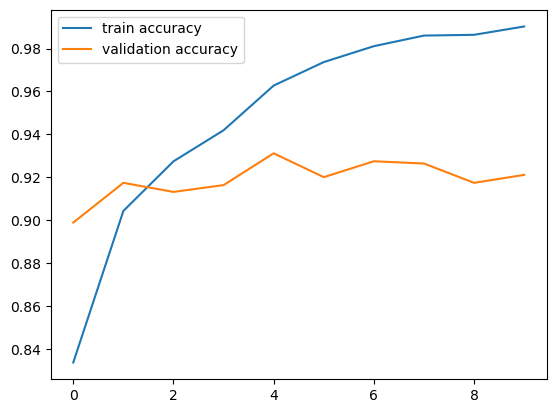

In [17]:
import matplotlib.pyplot as plt
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [21]:
model.save("Face_Mask_Detection.h5")